In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

def min_max_norm(x):
    mx = np.min(x)
    return (x - mx)/(np.max(x)-mx)

def std_norm(x):
    return (x - np.mean(x))/np.std(x)

In [2]:
dataset = pd.read_csv(filepath_or_buffer='train.csv', na_values=["?"]).drop("Id", axis=1)
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data = dataset.drop('SalePrice', axis=1)
target = dataset.values[:, -1].astype(np.float)

cat_features_mask = (data.dtypes == "object").values

np.max(target)

755000.0

### Standard Normalization

In [4]:
normalizer = preprocessing.StandardScaler()

X_real = data[data.columns[~cat_features_mask]]
mis_replacer = KNNImputer(n_neighbors=9, weights='distance')
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)
X_no_mis_norm = normalizer.fit_transform(X_no_mis_real)

X_cat = data[data.columns[cat_features_mask]].fillna("")

X_cat_one_hot = pd.get_dummies(X_cat, drop_first=True).values

target_norm = std_norm(target)

print(X_cat_one_hot.shape)

X = np.concatenate([X_no_mis_norm, X_cat_one_hot], axis=1)

(1460, 225)


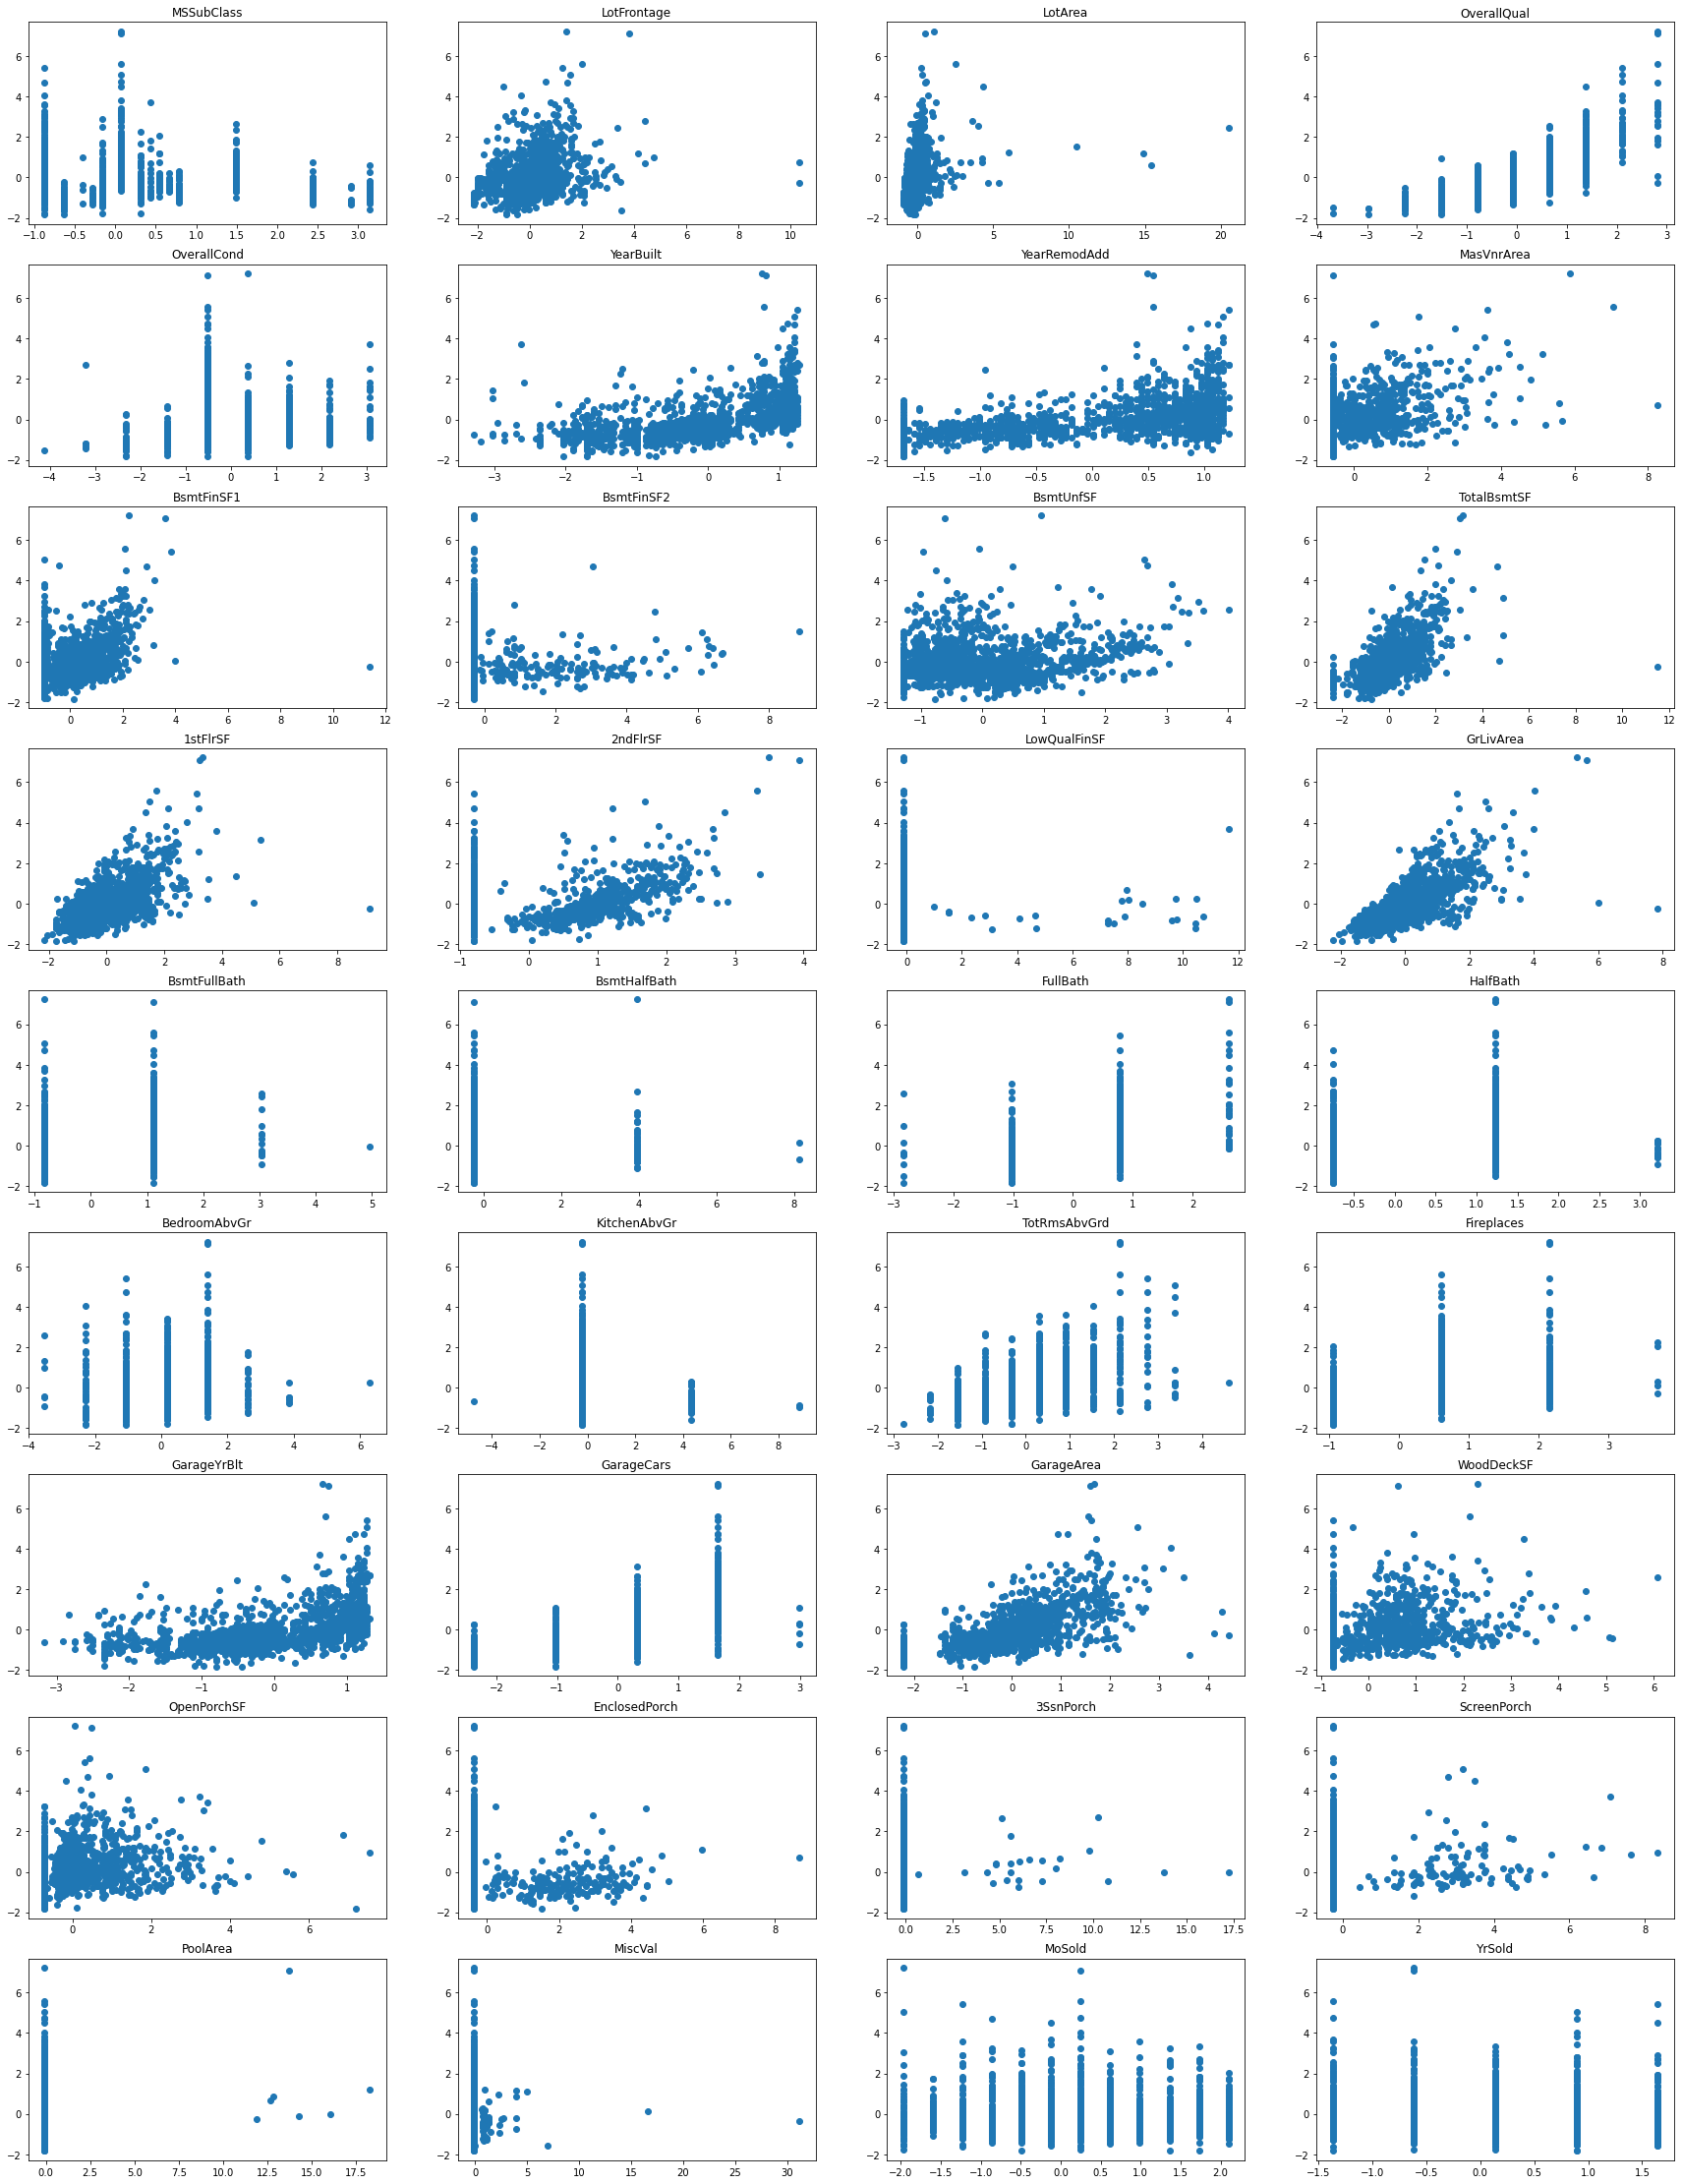

In [5]:
fig, axs = plt.subplots(9,4, figsize=(30,40))
i = 0

for column, name in zip(np.transpose(X_no_mis_norm, (1, 0)), X_real.columns):
    axs[int(i/4), int(i%4)].scatter(column, target_norm)
    axs[int(i/4), int(i%4)].set_title(name)
    i += 1

plt.show()

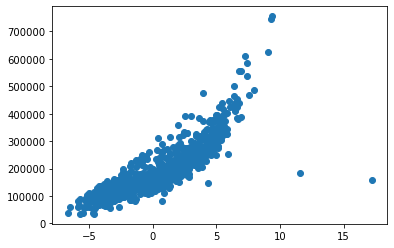

In [6]:
pca = PCA(n_components=1)
res = pca.fit_transform(X)
plt.scatter(res, target)
plt.show()

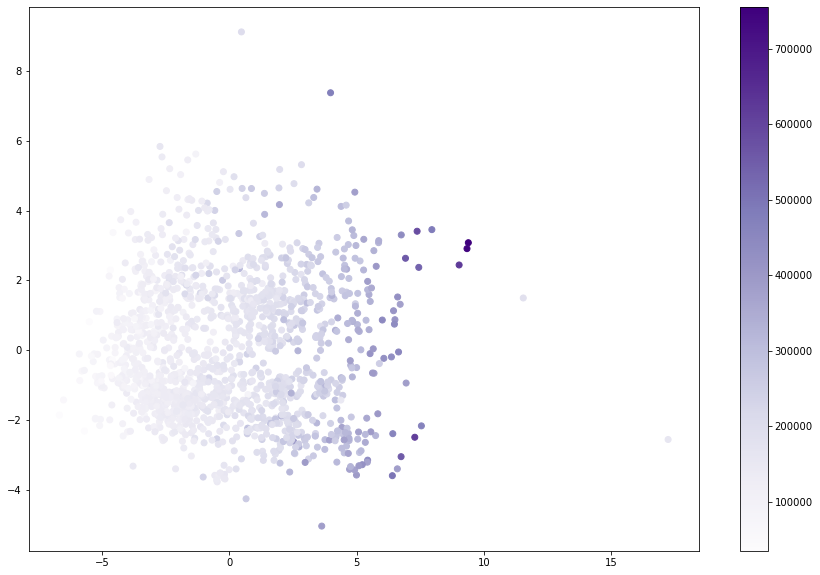

In [7]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
res = np.transpose(res, (1, 0))
x, y = res

plt.figure(figsize=[15, 10])
plt.scatter(x, y, c=target, cmap='Purples')
plt.colorbar()
plt.show()

### MinMax Normalization

In [8]:
normalizer = preprocessing.MinMaxScaler()

X_real = data[data.columns[~cat_features_mask]]
mis_replacer = KNNImputer(n_neighbors=9, weights='distance')
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)
X_no_mis_norm = normalizer.fit_transform(X_no_mis_real)

X_cat = data[data.columns[cat_features_mask]].fillna("")

X_cat_one_hot = pd.get_dummies(X_cat, drop_first=True).values

target_norm = min_max_norm(target)

print(X_cat_one_hot.shape)

X = np.concatenate([X_no_mis_norm, X_cat_one_hot], axis=1)

(1460, 225)


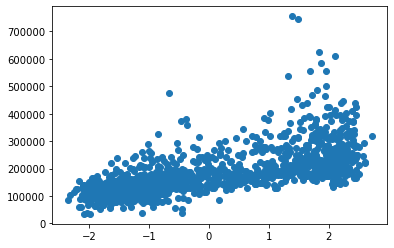

In [9]:
pca = PCA(n_components=1)
res = pca.fit_transform(X)
plt.scatter(res, target)
plt.show()

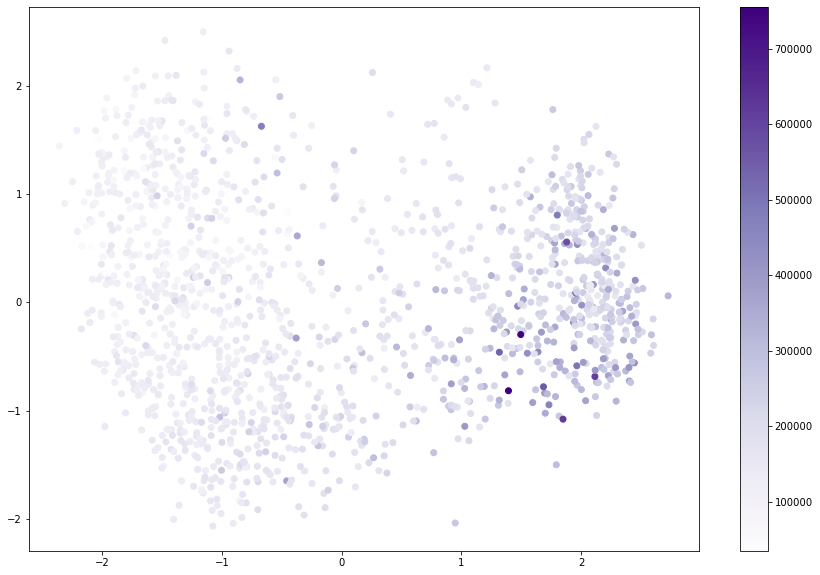

In [10]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
res = np.transpose(res, (1, 0))
x, y = res

plt.figure(figsize=[15, 10])
plt.scatter(x, y, c=target, cmap='Purples')
plt.colorbar()
plt.show()

PCA results for standard normalization looks more representative